# viresclient

# Aims

- Direct access to "computation-ready" data without worrying about:
  - file formats; file organisation
  - model forward code
  
- Provide a dependable interface to a wide arrange of "data"
  - new products added / old products changed: access them in the same way
  
- Complementary to the VirES web interface
  - More prerequisite knowledge needed (++time)
  - ... but more freedom than the GUI

# 1: Basic usage: *accessing data*

In [1]:
from viresclient import SwarmRequest
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(["F", "B_NEC"])
data = request.get_between("2019-01-01", "2019-01-02")
print(data)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] (5.621MB)


viresclient ReturnedData object of type cdf
Save it to a file with .to_file('filename')
Load it as a pandas dataframe with .as_dataframe()
Load it as an xarray dataset with .as_xarray()


In [2]:
data.to_file("test_file.cdf", overwrite=True)

Data written to test_file.cdf


# 1: Basic usage: *translating to a pandas dataframe*
<center>
<img src="img/pandas.png" width="500"/>
</center>

In [3]:
df = data.as_dataframe(expand=True)
df.head()

,Spacecraft,Latitude,Longitude,Radius,F,B_NEC_N,B_NEC_E,B_NEC_C
2019-01-01 00:00:00,A,-17.029902,-136.020760,6819106.81,27177.2411,23675.8346,5295.5528,-12248.4860
2019-01-01 00:00:01,A,-16.965741,-136.021687,6819098.76,27160.4330,23685.5394,5290.1805,-12194.6394
2019-01-01 00:00:02,A,-16.901579,-136.022616,6819090.71,27143.6815,23695.2730,5284.5827,-12140.7419
2019-01-01 00:00:03,A,-16.837417,-136.023547,6819082.65,27127.0045,23705.0150,5278.8028,-12086.7943
2019-01-01 00:00:04,A,-16.773255,-136.024480,6819074.58,27110.3737,23714.6933,5273.2987,-12032.8263


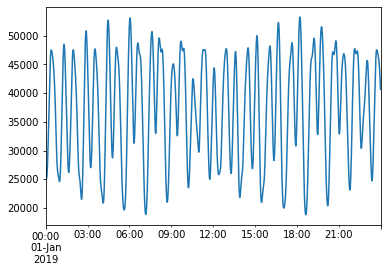

In [4]:
%matplotlib inline
df["F"].plot();

## Some very short pandas examples....

In [5]:
df.describe()

,Latitude,Longitude,Radius,F,B_NEC_N,B_NEC_E,B_NEC_C
count,86400.000000,86400.000000,8.640000e+04,86400.000000,86400.000000,86400.000000,86400.000000
mean,1.155294,-1.629096,6.815232e+06,37410.442724,14772.935307,60.615997,1848.167209
std,51.787736,104.273714,6.615887e+03,9144.052183,9190.478710,4844.955323,33964.585152
min,-87.346563,-179.995322,6.804485e+06,18823.264000,-11667.202400,-12913.468900,-53194.233500
25%,-43.785362,-87.030647,6.808636e+06,29574.217075,8659.573700,-2833.234175,-29038.685625
50%,1.760706,-7.505913,6.816694e+06,38669.085350,14962.491550,137.742450,-986.058400
75%,46.453081,87.254043,6.821806e+06,45895.150975,22069.236525,3170.253025,37875.310025
max,87.346203,179.994337,6.823164e+06,53266.250300,32982.012300,12372.612300,49093.207000


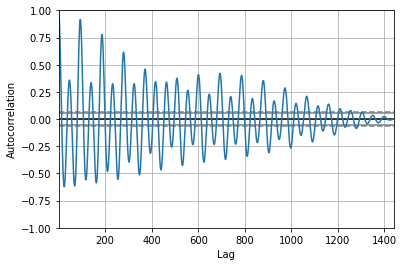

In [6]:
from pandas.plotting import autocorrelation_plot

df["F"].resample("60s").mean().pipe(autocorrelation_plot);

# 1. Basic usage: *translate to an xarray Dataset*

<img src="img/xarray.png" width="200"/>

In [7]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 86400, dim: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2019-01-01 ... 2019-01-01T23:59:59
Dimensions without coordinates: dim
Data variables:
    Spacecraft  (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 -17.03 -16.97 -16.9 ... 44.06 44.0 43.93
    Longitude   (Timestamp) float64 -136.0 -136.0 -136.0 ... 40.88 40.88 40.88
    Radius      (Timestamp) float64 6.819e+06 6.819e+06 ... 6.809e+06 6.809e+06
    F           (Timestamp) float64 2.718e+04 2.716e+04 ... 4.07e+04 4.068e+04
    B_NEC       (Timestamp, dim) float64 2.368e+04 5.296e+03 ... 3.599e+04
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20190101T000000_20190101T235959_050...
    MagneticModels:  []
    RangeFilters:    []

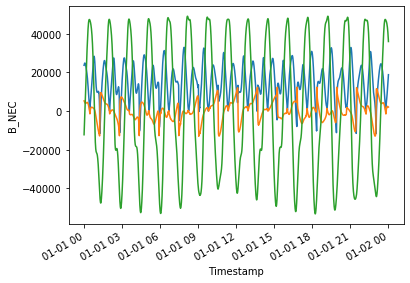

In [8]:
for i in (0, 1, 2):
    ds["B_NEC"][:, i].plot()

# 2. Work with models and residuals

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ] (3.547MB)


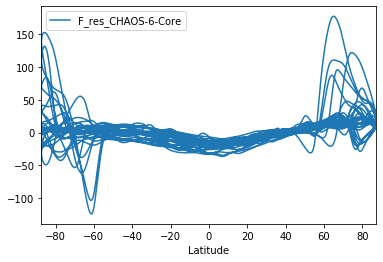

In [9]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F"],
    models=["CHAOS-6-Core"],
    residuals=True
)
df = request.get_between("2019-01-01", "2019-01-02").as_dataframe()
df.plot(y="F_res_CHAOS-6-Core", x="Latitude");

# 3. Robust and easy access to larger volumes of data

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:18, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ] (17.746MB)


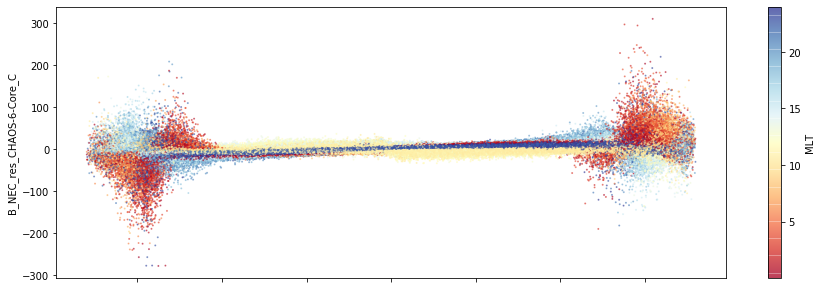

In [10]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(measurements=["B_NEC"], models=["CHAOS-6-Core"], residuals=True, auxiliaries=["MLT", "QDLat"], sampling_step="PT60S")
request.set_range_filter("Flags_F", 0, 1)
data = request.get_between("2019-01-01", "2019-07-01")  # 6 MONTHS

df = data.as_dataframe(expand=True)
from matplotlib import cm
df.plot(y="B_NEC_res_CHAOS-6-Core_C", x="QDLat", kind="scatter", figsize=(15,5), c="MLT", cmap=cm.RdYlBu, s=1, alpha=0.5);

In [11]:
# Names of original data files are logged
data.sources[:10]

['SW_OPER_MAGA_LR_1B_20190101T000000_20190101T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190102T000000_20190102T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190103T000000_20190103T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190104T000000_20190104T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190105T000000_20190105T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190106T000000_20190106T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190107T000000_20190107T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190108T000000_20190108T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190109T000000_20190109T235959_0506_MDR_MAG_LR',
 'SW_OPER_MAGA_LR_1B_20190110T000000_20190110T235959_0506_MDR_MAG_LR']

# 4. Future development: *build in pre-defined plot types?*

## Example: newly added IPDxIRR plasma data

Potential interface:

```python
from viresclient import SwarmQuicklook
fig = SwarmQuicklook("IPDxIRR", spacecraft="Alpha", options...)
```
to produce a nice figure, to replace the following code...

In [12]:
from viresclient import SwarmRequest
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

request = SwarmRequest()
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data = request.get_between("2014-12-21T00:00", "2014-12-21T03:00")
df = data.as_dataframe()

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
df.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df.plot(ax=axes[3], y=['ROD'])
df.plot(ax=axes[4], y=['mROT'])
df.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
for ax in axes:
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)
plt.close()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (2.273MB)


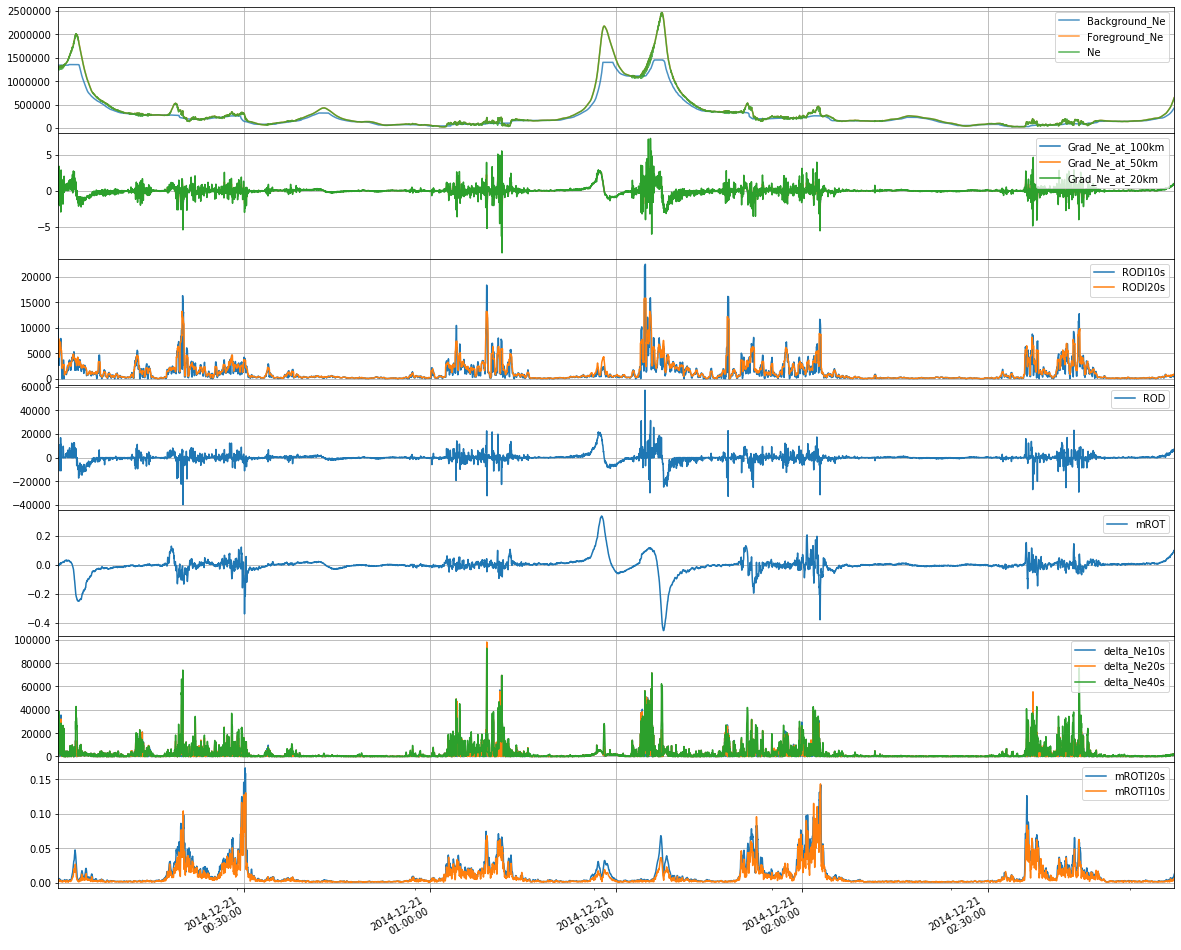

In [13]:
fig # = SwarmQuicklook("IPDxIRR", spacecraft="Alpha", options...)

# 4. Future development: *integrate with other libraries*

<center>

## *Scientific Python stack:*
<table><tr>
    <td><img src="img/scipy_stack.png" width="600"/></td>
    <td><img src="img/matplotlib.png" width="200"/></td>
    <td><img src="img/cartopy.jpeg" width="200"/></td>
    <td><img src="img/jupy_logo.png" width="100"/></td>
</tr></table>

<table><tr>
    <td><font size="+2" >Domain-specific libraries:</font></td>
    <td><img src="img/pysat.png" width="150"/></td>
    <td><img src="img/heliopy.png" width="200"/></td>
    <td><img src="img/spacepy.jpg" width="200"/></td>
    <td><font size="+2">pyAMPS, MagPySV  ...</font></td>
</tr></table>


<table><tr>
    <td><font size="+2">PyViz advanced visualisation:</font></td>
    <td><img src="img/pyviz_libraries.png" width="600"/></td>
</tr></table>

In [14]:
# https://towardsdatascience.com/pyviz-simplifying-the-data-visualisation-process-in-python-1b6d2cb728f1

# import hvplot.pandas

# x, y, c = "QDLat", "B_NEC_res_CHAOS-6-Core_C", "MLT"
# df[::10][[x, y, c]].hvplot(x, y, c=c, kind="scatter", cmap=cm.RdYlBu, s=1, alpha=0.5)
# df.hvplot(x, y)

# 5. Develop other packages which connect to viresclient

## SwarmPyFAC (author: Ask Neve Gamby)

*New Swarm-DISC GitHub organisation*

https://github.com/Swarm-DISC/SwarmPyFAC

<img src="img/swarm_disc_github.png" width="500"/>

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:33, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:08, Remaining: 00:00 ] (18.068MB)


Data written to tempdata.cdf


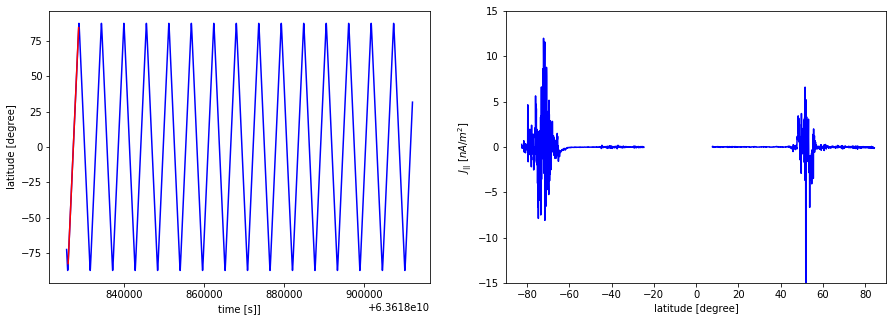

In [15]:
import swarmpyfac as fc
import datetime as dt
import numpy as np
output, input_data = fc.fac_from_file(start=dt.datetime(2016, 1, 1), end=dt.datetime(2016, 1, 2), user_file=None)
time, position, __, fac, *___ = output
selection = np.arange(380,3000)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].plot(time,position[:,0],'b')
axes[0].plot(time[selection],position[selection,0],'r')
axes[0].set_xlabel('time [s]]'); axes[0].set_ylabel('latitude [degree]')
axes[1].plot(position[selection,0],fac[selection],'b')
axes[1].set_xlabel('latitude [degree]'); axes[1].set_ylabel('$J_{||} \; [nA/m^2]$')
axes[1].axis([-90, 90, -15,15]);

# 6. Evolution of the VirES/VRE system

---

<table><tr>
    <td><img src="img/VRE-viresclient.png" width="800"/></td>
    <td><img src="img/VRE_shortest_demo.gif" width="600"/></td>
</tr></table>